## Frames of Reference and vectors

In [1]:
from sympy import *
import sympy.physics.mechanics as me
me.init_vprinting()

In [2]:
t = symbols("t")
f = Function("f")(t)
f.diff(t, 2) + f.diff(t)

In [3]:
N = me.ReferenceFrame("N")
N.x, N.y, N.z

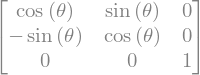

In [4]:
theta = symbols("theta")
A = me.ReferenceFrame("A")
A.orient_axis(N, N.z, theta)
A.dcm(N)

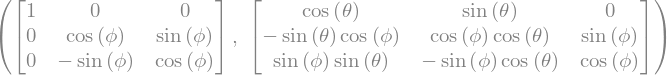

In [5]:
phi = symbols("phi")
B = me.ReferenceFrame("B")
B.orient_axis(A, A.x, phi)
B.dcm(A), B.dcm(N)

In [6]:
v1 = N.x + 2 * N.y + 3 * N.z
v1

In [7]:
v2 = N.x + 2 * A.y + 3 * B.z
v2

In [8]:
display(v1.express(A), v2.express(N))

In [ ]:
scalar_field = N[0] * N[1] + N[2]
res = me.gradient(scalar_field, N)
display(scalar_field, res)

In [ ]:
C = me.ReferenceFrame("C", variables=["x", "y", "z"])
vector_field = C[0]*C[1]*C[2] * C.x
res = me.curl(vector_field, C)
display(vector_field, res)

### Time-dependent vectors

In [ ]:
theta, a, b, c = me.dynamicsymbols("theta, a, b, c")
thetad, ad, bd, cd = me.dynamicsymbols("theta, a, b, c", 1)
display((theta, a, b, c), (thetad, ad, bd, cd))

In [ ]:
D = me.ReferenceFrame("D")
D.orient_axis(N, N.z, theta)
v = a * D.x + b * D.y + c * D.z
v

In [ ]:
t = symbols("t")
v.diff(t, D)

In [ ]:
v.diff(t, N)

## Coordinates, velocities and accelerations

In [ ]:
q1, q2, q3 = me.dynamicsymbols("q1, q2, q3")
N, A, B = symbols("N, A, B", cls=me.ReferenceFrame)
A.orient_axis(N, N.z, q1)
B.orient_axis(A, A.z, q2 - q1)

In [ ]:
O, P, Q, R = symbols("O, P, Q, R", cls=me.Point)

In [ ]:
L1, L2 = symbols("L1, L2")
P.set_pos(O, L1 * A.x)
Q.set_pos(P, L2 * B.x)
R.set_pos(O, q3 * N.x)

In [ ]:
OP1 = P.pos_from(O)
OP2 = P.pos_from(O).express(N)
display(OP1, OP2)

In [ ]:
OQ1 = Q.pos_from(O)
OQ2 = Q.pos_from(O).express(N).simplify()
display(OQ1, OQ2)

In [ ]:
R.pos_from(O)

### Setting the velocities

In [ ]:
O.set_vel(N, 0)

In [ ]:
P.v2pt_theory(O, N, A)

In [ ]:
Q.v2pt_theory(P, N, B)

In [ ]:
u3 = me.dynamicsymbols("u3")
R.set_vel(N, u3 * N.x)

In [ ]:
R.vel(N)

### Particles and Rigid Bodies

In [ ]:
G1 = O.locatenew("G1", L1 / 2 * A.x)
G2 = P.locatenew("G2", L2 / 2 * B.x)

In [ ]:
m = symbols("m") # mass of the slider
slider_particle = me.Particle("slider", R, m)

In [ ]:
G1 = O.locatenew("G1", L1 / 2 * A.x) # CoM of the crank
G2 = P.locatenew("G2", L2 / 2 * B.x) # CoM of the rod

In [ ]:
rho1, rho2 = symbols("rho_1, rho_2")
inertia1 = me.inertia(A, 0, 0, rho1 * L1**3 / 12)
inertia2 = me.inertia(B, 0, 0, rho2 * L2**3 / 12)
inertia1, inertia2

In [ ]:
type(inertia1)

In [ ]:
inertia1.to_matrix(A)

In [ ]:
crank_body = me.RigidBody("crank", G1, A, rho1 * L1, (inertia1, G1))
rod_body = me.RigidBody("rod", G2, B, rho2 * L2, (inertia2, G2))